In [35]:
import os
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

os.system('mkdir -p henry_constants')

0

In [36]:
hfc_list = ['R32', 'R134a', 'R125']
des_list = ['c2mim_hdfs_pfpa[1_2]', 'tba_nfs_pfpa[1_2]', 'tbp_br_pfpa[1_2]']

def func(x, a, b, c):
    return a * x**2 + b * x + c

/var/folders/_q/zbq0mww96yjg3qbcs4mxd28m0000gn/T/ipykernel_12160/1071897212.py:7: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func, x1, p)


Henry constant:  5.279455268245486
Henry constant:  0.49099916961071133
Henry constant:  0.40441001563054013
Henry constant:  2.0557703891968595
Henry constant:  0.4886575675528812
Henry constant:  0.5191083376397356
Henry constant:  2.2860758585894234
Henry constant:  1.1234456334634064
Henry constant:  0.7980882122776674


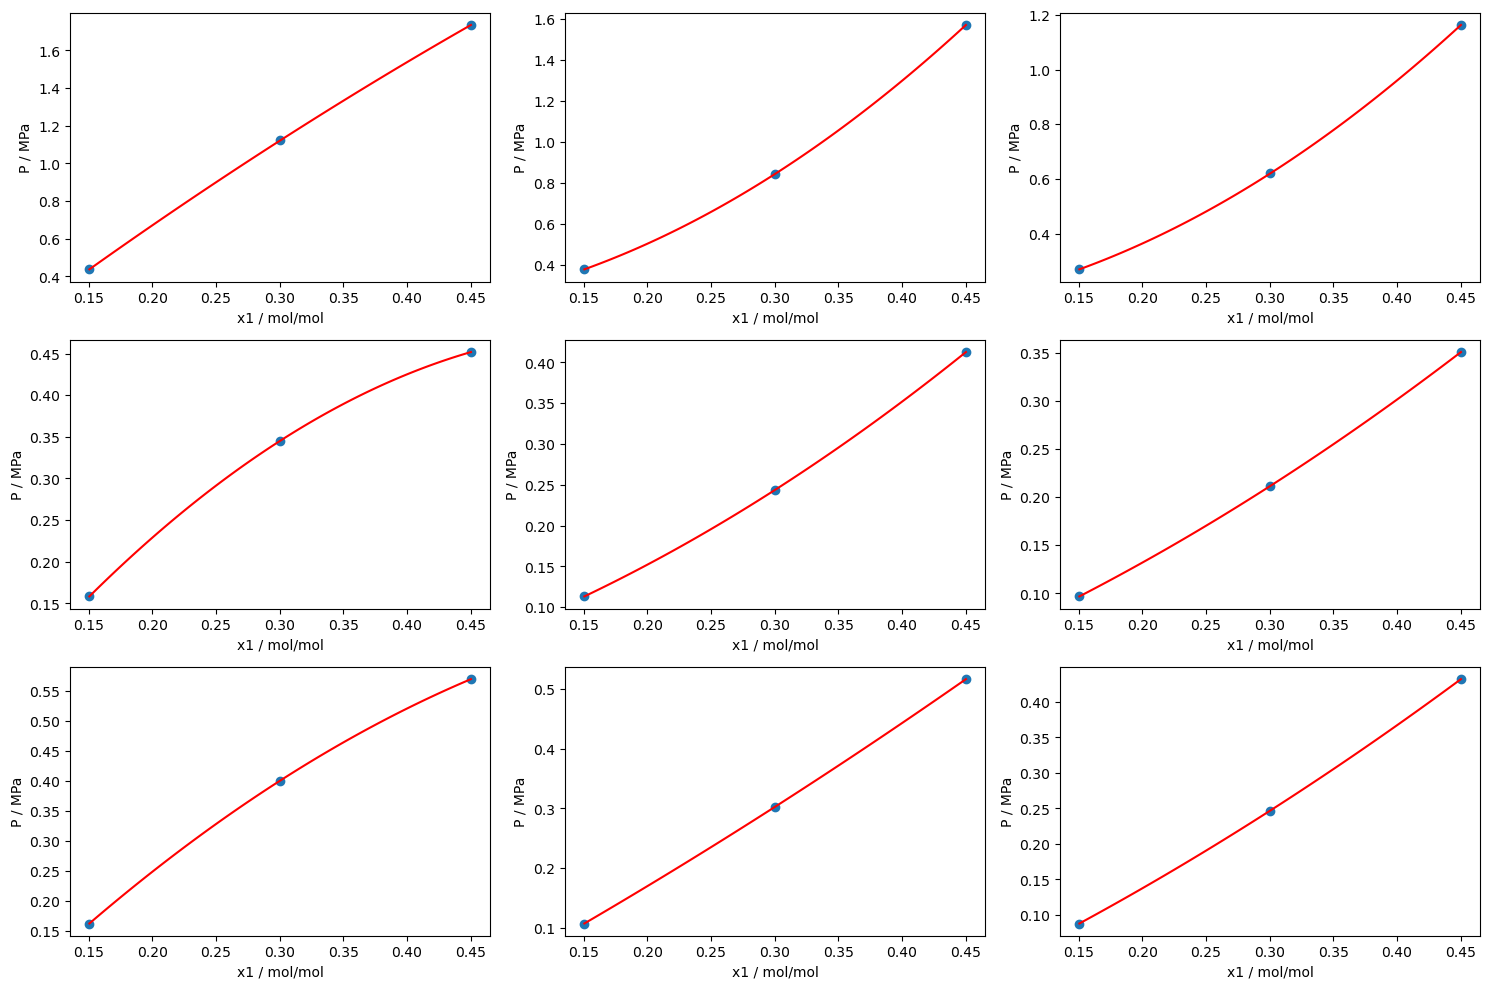

In [37]:
plt.figure(figsize=(15, 10))
for i in range(len(des_list)):
    kh_vec = []
    for j in range(len(hfc_list)):
        inp_str = 'isotherms/px_'+hfc_list[i]+'_'+des_list[j]+'.out'
        x1, p, dp = np.loadtxt(inp_str, comments='#', unpack=True)
        popt, pcov = curve_fit(func, x1, p)
        kh = popt[1]
        kh_vec.append(kh)
        print('Henry constant: ', kh)
        plt.subplot(len(hfc_list), len(des_list), i*len(des_list)+j+1)
        x_fit = np.linspace(min(x1), max(x1), 100)
        p_fit = func(x_fit, *popt)
        plt.plot(x1, p, 'o')
        plt.plot(x_fit, p_fit, 'r-')
        plt.xlabel('x1 / mol/mol')
        plt.ylabel('P / MPa')
    with open('henry_constants/'+des_list[i]+'.txt', 'w') as f:
        f.write('# HFC\tKH/MPa\n')
        for j in range(len(hfc_list)):
            f.write(f'{hfc_list[j]}\t{kh_vec[j]}\n')
plt.tight_layout()
plt.show()

Henry constant:  2.0340841886674363
Henry constant:  0.6333386987902344
Henry constant:  0.9782842112552484
Henry constant:  1.7129245694250603
Henry constant:  0.4889904356321823
Henry constant:  0.7348212258291354
Henry constant:  1.1211282397938687
Henry constant:  0.22273542150597556
Henry constant:  0.23621932572093943


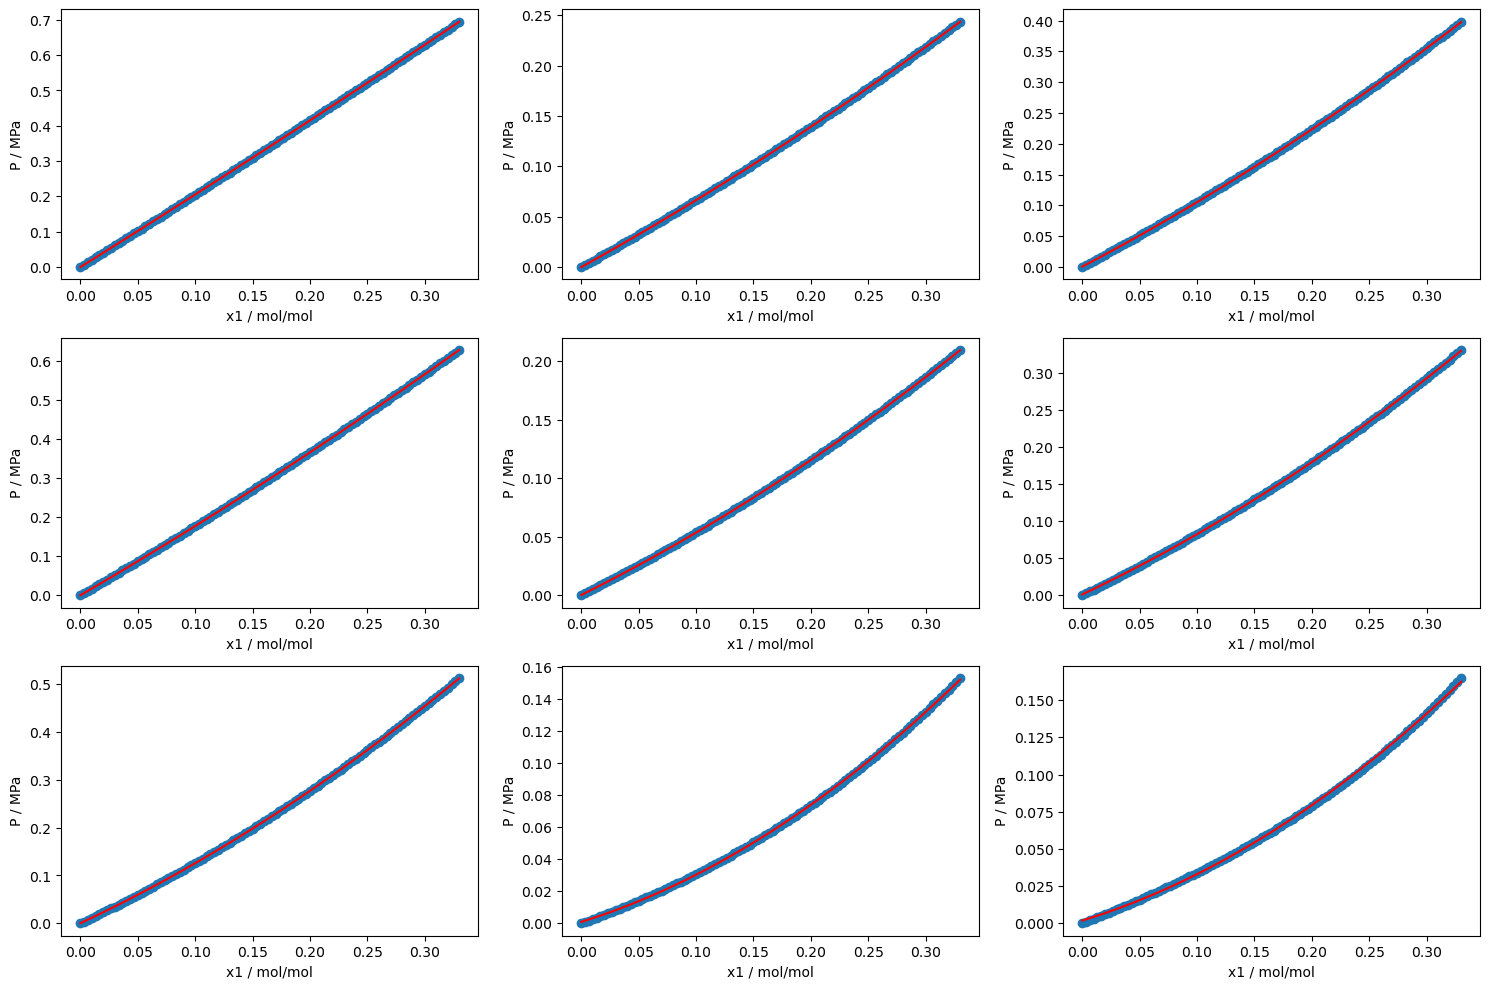

In [62]:
os.system('mkdir -p ../cosmo/henry_constants')

plt.figure(figsize=(15, 10))
for i in range(len(des_list)):
    kh_vec = []
    for j in range(len(hfc_list)):
        inp_str = '../cosmo/isotherms/'+hfc_list[j]+'+'+des_list[i]+'-TZVP.txt'
        x1, _, p = np.loadtxt(inp_str, comments='#', unpack=True)
        x1, p = x1[:100], p[:100]
        poly = np.polyfit(x1, p, 2)
        kh = poly[1]
        kh_vec.append(kh)
        print('Henry constant: ', kh)
        plt.subplot(len(hfc_list), len(des_list), i*len(des_list)+j+1)
        x_fit = np.linspace(min(x1), max(x1), 100)
        p_fit = np.polyval(poly, x_fit)
        plt.plot(x1, p, 'o')
        plt.plot(x_fit, p_fit, 'r-')
        plt.xlabel('x1 / mol/mol')
        plt.ylabel('P / MPa')
    with open('../cosmo/henry_constants/'+des_list[i]+'-TZVP.txt', 'w') as f:
        f.write('# HFC\tKH/MPa\n')
        for j in range(len(hfc_list)):
            f.write(f'{hfc_list[j]}\t{kh_vec[j]}\n')
plt.tight_layout()
plt.show()